## Desciption

This model is fairly simple, using the same architecture as CNN_1_3, which we found to be the best. It does not include augmented data, just takes the data from La Fleur's supplemental materials including:
 - La Fleur et al (and De Novo Designs)
 - Urtecho et al
 - Hossain et al
 - Yu et al
 - Lagator (36N, Pl, and Pr)
 - Anderson Series

We onehot encode each basepair and pad the whole sequence. Because we use a CNN which is designed to identify "features," the input promoter can be any length (with padding) and the model will be able to accurately predict the expression.

In [1]:
import CNN_5_0 as parent

In [2]:
name = 'CNN_5_4'

In [3]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='uniform')

df = pd.read_csv('../Data/combined/LaFleur_supp.csv')
X = df[['Promoter Sequence']].astype(str).agg(''.join, axis=1)
y = qt.fit_transform(df[['Observed log(TX/Txref)']].abs())

X, max_length = parent.preprocess_sequences(X)

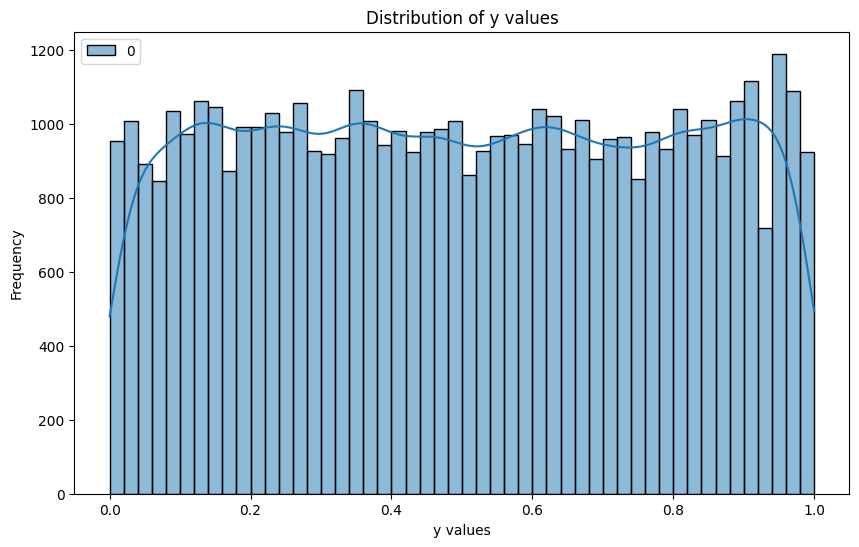

In [4]:
# graph the distribution of y
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y, bins=50, kde=True)
plt.title('Distribution of y values')
plt.xlabel('y values')
plt.ylabel('Frequency')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

Epoch 1/150


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1220/1220 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0306 - val_loss: 0.0148
Epoch 2/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0127 - val_loss: 0.0120
Epoch 3/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0109 - val_loss: 0.0109
Epoch 4/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0099 - val_loss: 0.0116
Epoch 5/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0090 - val_loss: 0.0104
Epoch 6/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0082 - val_loss: 0.0106
Epoch 7/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0076 - val_loss: 0.0101
Epoch 8/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0069 - val_loss: 0.0098
Epoch 9/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0066 - val_loss: 0.0095
Epoch 10/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0060 - val_loss: 0.0096
Epoch 11/150
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0056 - val_loss: 0.0102
Epoch 12/150
1220/1220 ━━━━━━━━

1524/1524 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


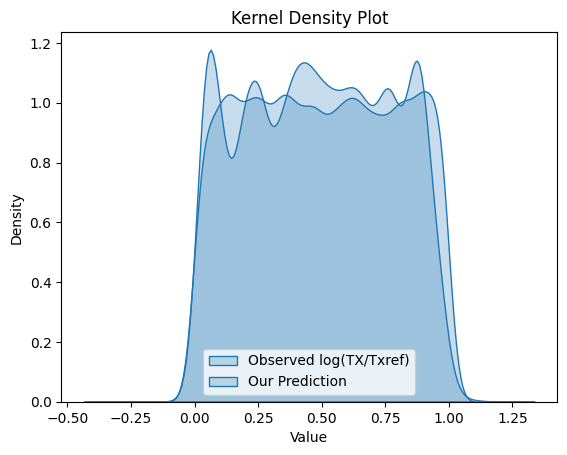

MemoryError: Unable to allocate 2.21 GiB for an array with shape (48767, 48767) and data type bool

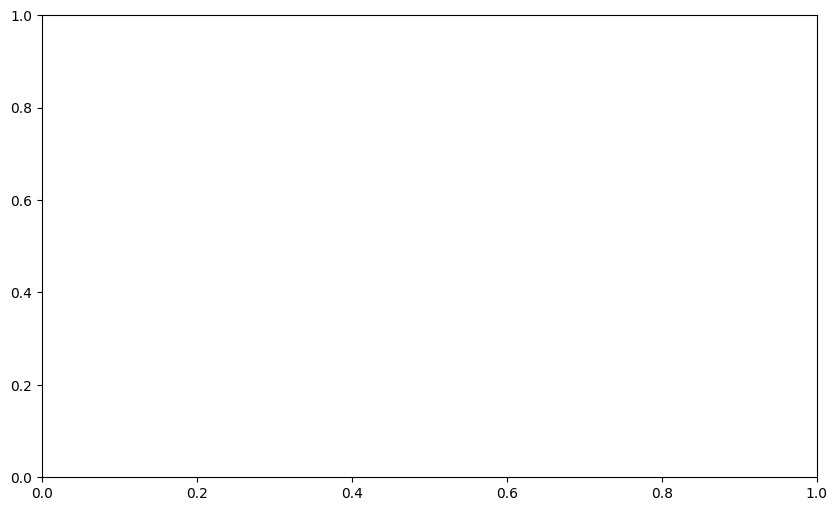

In [7]:
predicted = parent.load_and_predict(name, X)
observed = y

parent.plot_kde(observed, predicted)
# parent.plot_scatter(observed, parent.ravel(predicted))
parent.plot_hexbin(observed, parent.ravel(predicted))

305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


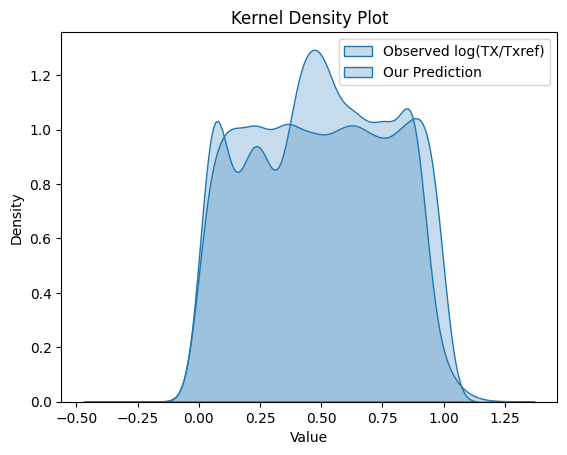

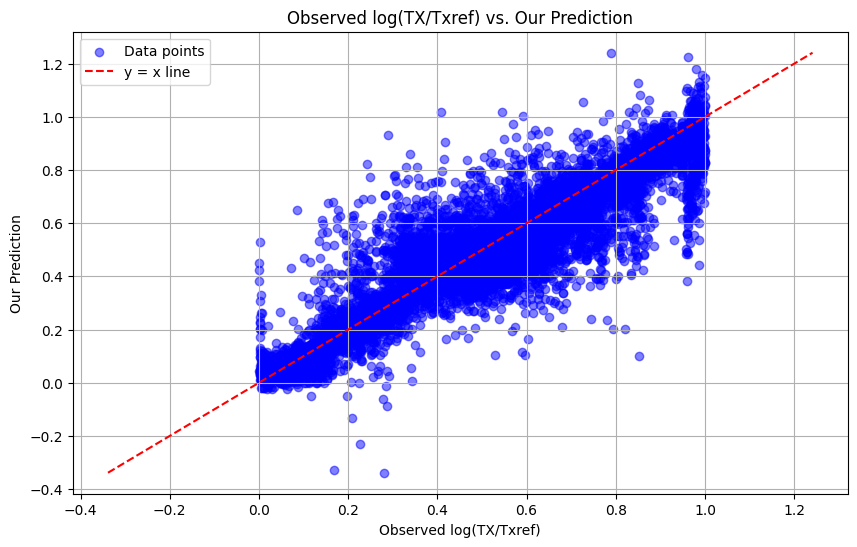

MemoryError: Unable to allocate 90.7 MiB for an array with shape (9754, 9754) and data type bool

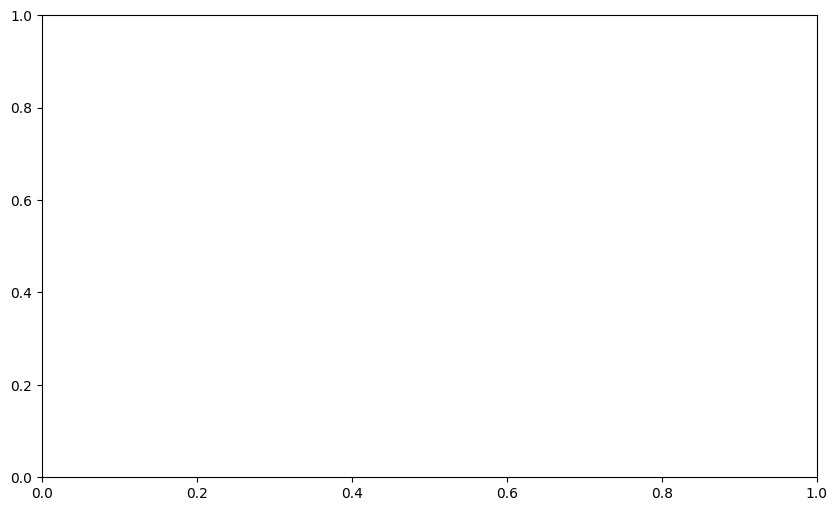

In [8]:
predicted = parent.load_and_predict(name, X_test)
observed = y_test

parent.plot_kde(observed, predicted)
parent.plot_scatter(observed, parent.ravel(predicted))
parent.plot_hexbin(observed, parent.ravel(predicted))

In [9]:
# Load, predict, and evaluate the best model
y_pred = parent.load_and_predict(name, X_test)
mse, rmse, mae, r2 = parent.calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE:  0.011304404123665035
RMSE:  0.10632217136451379
MAE:  0.07157074331354417
R2:  0.8637924750990527


In [ ]:
from keras.models import Sequential, load_model

model = load_model('../Models/' + name + '.keras')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 147, 64)        │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 73, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 70, 64)         │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 35, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2240)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       143,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 483,077 (1.84 MB)

 Trainable params: 161,025 (629.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,052 (1.23 MB)

In [ ]:
model.save('../Models/' + name + '.hdf5')